# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:




## 1. Show DataFrame info.


In [1]:
#importing all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#reding csv-filed which was created in lab 2
df_marketing = pd.read_csv('df_marketing.csv')

#showing df info
df_marketing.info

<bound method DataFrame.info of       Unnamed: 0 customer       state  customer_lifetime_value response  \
0              0  DK49336     Arizona              4809.216960       No   
1              1  KX64629  California              2228.525238       No   
2              2  LZ68649  Washington             14947.917300       No   
3              3  XL78013      Oregon             22332.439460      Yes   
4              6  IW72280  California              5035.035257       No   
...          ...      ...         ...                      ...      ...   
9129       10903  SU71163     Arizona              2771.663013       No   
9130       10904  QI63521      Nevada             19228.463620       No   
9131       10906  KX53892      Oregon              5259.444853       No   
9132       10907  TL39050     Arizona             23893.304100       No   
9133       10908  WA60547  California             11971.977650       No   

      coverage             education effective_to_date employment_s

## 2. Describe DataFrame.


In [3]:
#showing list of columns
df_marketing.columns

Index(['Unnamed: 0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'effective_to_month'],
      dtype='object')

In [4]:
#getting an overview of dataframe (easier overview than by .info)
df_marketing.head()

,Unnamed: 0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2


In [5]:
#showing data types
df_marketing.dtypes

Unnamed: 0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [6]:
#describing dataframe
df_marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9134.0,5490.357675,3148.183236,0.000000,2764.250000,5508.500000,8218.750000,10908.000000
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
effective_to_month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


## 3. How a plot of the total number of responses.


In [7]:
#showing the unique values in the column response
df_marketing['response'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
#showing the total number of responses
df_marketing['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [21]:
#trying to store the total number of responses in a new dataframe
counts_response = pd.DataFrame((df_marketing['response']).value_counts())
counts_response

,response
No,7826
Yes,1308


In [24]:
counts_response.columns

Index(['response'], dtype='object')

c:\users\katha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


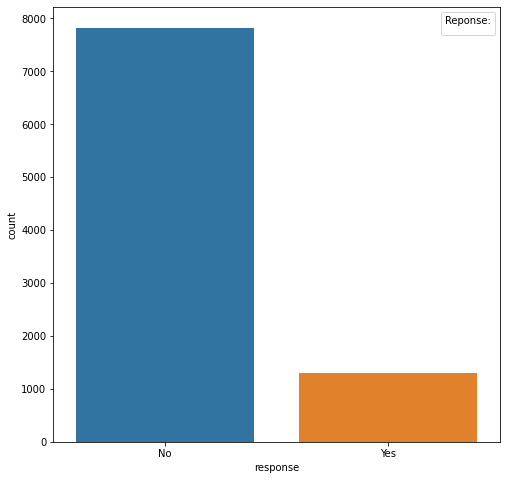

In [58]:
#creating a count bar chart showing the response counts with matplotlib
plt.figure(figsize=(8,8))

sns.countplot('response', data=df_marketing)
plt.legend(title="Reponse:")
plt.show()

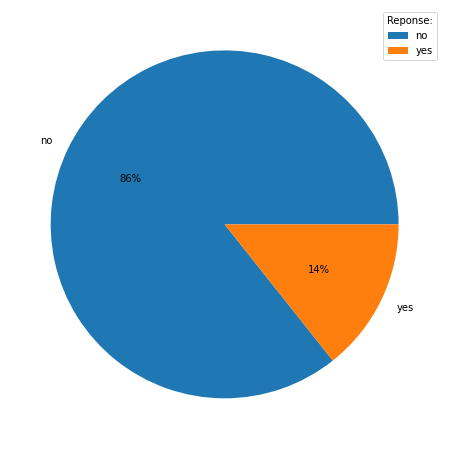

In [11]:
#creating labels
my_labels = ['no', 'yes']

#creating a pie chart showing the response rate with matplotlib
plt.figure(figsize=(8,8))

plt.pie(df_marketing['response'].value_counts(), labels=my_labels, autopct='%1.0f%%')
plt.legend(title="Reponse:")
plt.show()

## 4. Show a plot of the response rate by the sales channel.


In [12]:
#showing the unique values in the column sales channel
df_marketing['sales_channel'].unique()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

c:\users\katha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


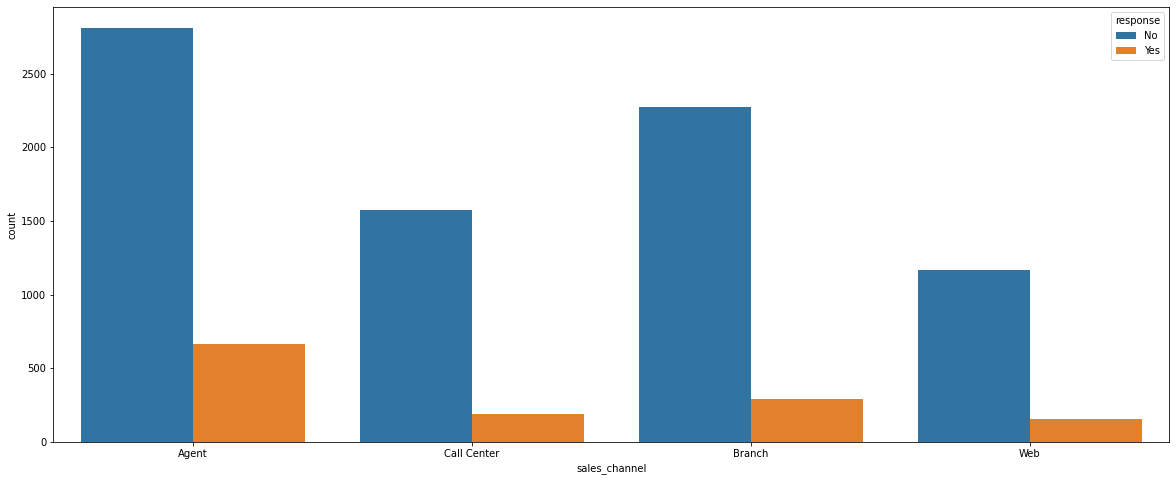

In [13]:
#creating a countplot for responses by sales channel with seaborn
plt.figure(figsize=(20,8))

actual = sns.countplot('sales_channel', hue='response', data=df_marketing)
plt.show()

<Figure size 2160x864 with 0 Axes>

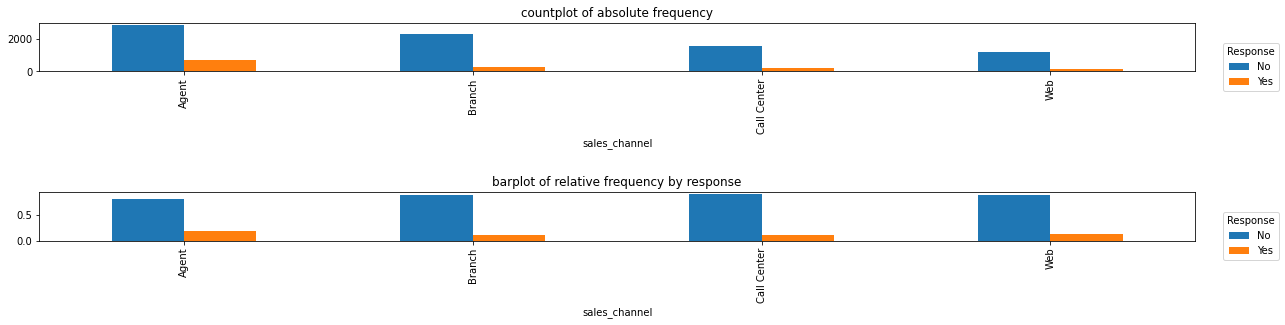

In [25]:
#creating a barplot for responses by sales channel with seaborn
#found the solution online, not exactly sure about all the different steps of the process

plt.figure(figsize=(30,12))

fig, (ax,ax2) = plt.subplots(nrows=2)

freq = pd.crosstab(df_marketing['sales_channel'],df_marketing['response'])
freq.plot(kind="bar", ax=ax)

relative = freq.div(freq.sum(axis=1), axis=0)
relative.plot(kind="bar", ax=ax2)


ax.set_title("countplot of absolute frequency")
ax2.set_title("barplot of relative frequency by response")


for a in [ax, ax2]: a.legend(title="Response", loc=6, bbox_to_anchor=(1.02,0.1))
plt.subplots_adjust(right=2.8,hspace=2.5)
plt.show()

In [40]:
#creating a dataframe to combine counts of response by sales channel
#cannot create a type of data frame which I can use further on to create charts

#what do we need to create a bar chart showing the reponse RATE rather then the actual counts?

response_sales = pd.DataFrame(df_marketing.groupby("response")['sales_channel'].value_counts(),)
response_sales

sales_channel
response sales_channel               
No       Agent                   2811
         Branch                  2273
         Call Center             1573
         Web                     1169
Yes      Agent                    666
         Branch                   294
         Call Center              192
         Web                      156

In [73]:
#creating new dataframes to store values for different sales channels

df_agent = df_marketing[(df_marketing['sales_channel']=='Agent')]
df_branch = df_marketing[(df_marketing['sales_channel']=='Branch')]
df_center = df_marketing[(df_marketing['sales_channel']=='Call Center')]
df_web = df_marketing[(df_marketing['sales_channel']=='Web')]

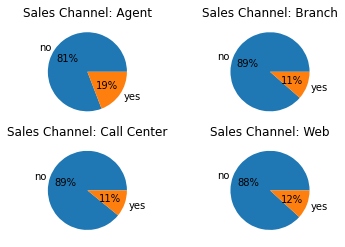

In [79]:
#using the new dataframes to create different pie charts showing response rate per sales channel
# multiple plots in the same space

fig, axs = plt.subplots(2, 2)

axs[0, 0].pie(df_agent['response'].value_counts(), labels=my_labels, autopct='%1.0f%%')
axs[0, 1].pie(df_branch['response'].value_counts(), labels=my_labels, autopct='%1.0f%%')
axs[1, 0].pie(df_center['response'].value_counts(), labels=my_labels, autopct='%1.0f%%')
axs[1, 1].pie(df_web['response'].value_counts(), labels=my_labels, autopct='%1.0f%%')

axs[0, 0].set_title("Sales Channel: Agent")
axs[0, 1].set_title("Sales Channel: Branch")
axs[1, 0].set_title("Sales Channel: Call Center")
axs[1, 1].set_title("Sales Channel: Web")

plt.show()

## 5. Show a plot of the response rate by the total claim amount.


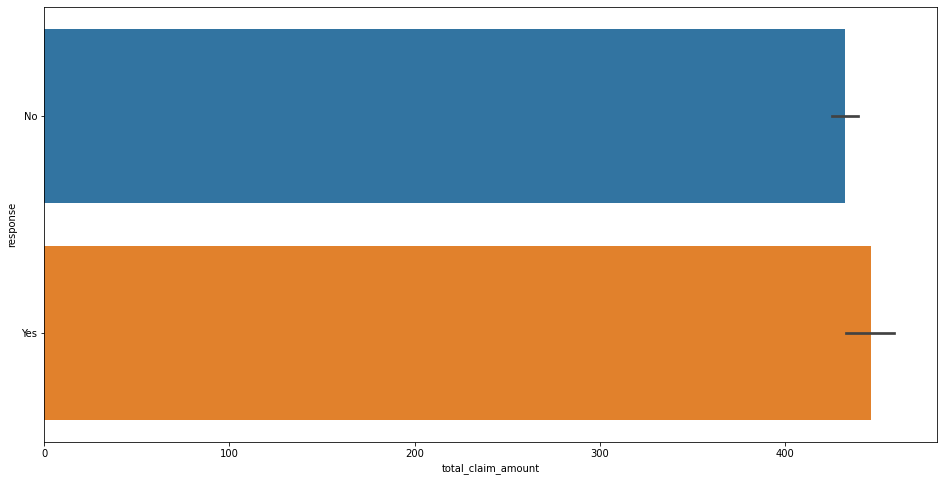

In [47]:
#barplot showing the (average?) total claim amount per type of response
#no possibility to show the reponse rate except if we would create different groups with a range of claim amount?

plt.figure(figsize=(16,8))

sns.barplot(x="total_claim_amount", y="response", data=df_marketing)
plt.show()

In [62]:
#looking at data of total claim amount to get a feeling of the different amounts
df_marketing['total_claim_amount']

0       292.800000
1       744.924331
2       480.000000
3       484.013411
4       287.556107
           ...    
9129    355.200000
9130    897.600000
9131    273.018929
9132    381.306996
9133    618.288849
Name: total_claim_amount, Length: 9134, dtype: float64

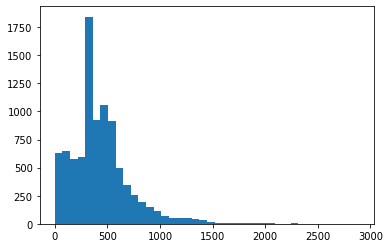

In [50]:
#showing divison of total claim amount in a histogram (matplotlib)
plt.hist(df_marketing['total_claim_amount'], bins=40)
plt.show()

## 6. Show a plot of the response rate by income.

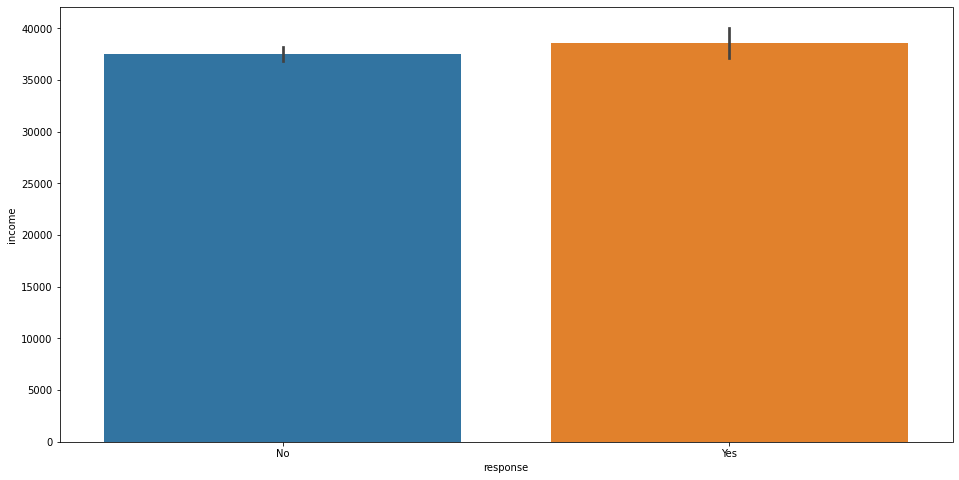

In [67]:
#showing (average?) income for response yes/no in a bar chart
#why is this showing the average income?

plt.figure(figsize=(16,8))

sns.barplot(x="response", y="income", data=df_marketing)
plt.show()